In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dat = pd.read_csv('./prices20191213.csv', index_col=0)

csi300 = pd.read_csv('./csi300.csv', index_col=0, header=None, names=['val'])
def get_csi300(year, month):
    return csi300.loc['%d年%d月' % (year, month), 'val']

def get_last_month(year, month):
    if month == 1:
        return year-1, 12
    else:
        return year, month-1

def get_month_dat(year = 2009, month = 11):
    date_list_for_this_month = []

    for date in dat.index:
        date3 = date.split('-')
        if date3[0] == str(year) and (date3[1] == str(month) or date3[1] == '0'+str(month)):
            date_list_for_this_month.append(date)
    return dat.loc[date_list_for_this_month].dropna(axis=1, how='any')

def get_month_change(dat_mo, asending_opt = True):
    return ((dat_mo.iloc[-1]-dat_mo.iloc[0])/dat_mo.iloc[0]).sort_values(ascending=asending_opt)

def buy(year, month, account_money, asending_opt):
    if month == 1:
        dat_mo = get_month_dat(year-1, 12)
    else:
        dat_mo = get_month_dat(year, month-1)

    stock_lst = get_month_change(dat_mo, asending_opt)[:100].index
    stock_price = ((get_month_dat(year, month).iloc[0])[stock_lst]).dropna(how='any')
    stock_lst = stock_price.index

    money_per_stock = 0.01*account_money
    count = (money_per_stock/stock_price).astype(np.int)
    paid = (count*stock_price).sum()
    account_money = account_money - paid


    # sell
    stock_price_month_end = (get_month_dat(year, month).iloc[-1])[stock_lst].dropna(how='any')
    stock_lst = stock_price_month_end.index
    sold = count[stock_lst]*stock_price_month_end
    account_money = account_money+sold.sum()
    
    
    return account_money

def operation10years(buy_if = lambda yr, mo: True, asending_opt = True):
    year = 2009
    month = 12

    account_money = 100000000
    account_money_cached = [account_money]

    while True:
        if buy_if(year, month):
            account_money = buy(year, month, account_money, asending_opt)
        account_money_cached.append(account_money)

        if month == 12:
            year = year+1
            month = 1
        else:
            month = month+1

        if year == 2019 and month == 12:
            break

    plt.plot(account_money_cached)

# 1. 如果过去10年，每个月初按均分买入上个月下跌最大的100只股票（就是每只股票买0.01乘总财富），然后在当月月底卖出，这样持续地每个月操作，这样的策略的收益是怎样的？不用考虑手续费。

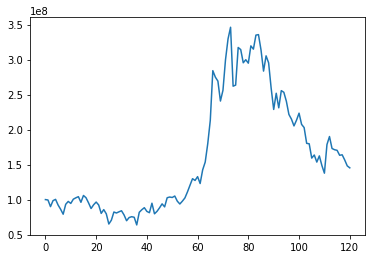

In [2]:
operation10years()

# 2. 如果过去10年，每个月初进行一次判断，如果上个月沪深300指数涨了，按均分买入上个月下跌最大的100只股票（就是每只股票买0.01乘总财富），然后在当月月底卖出，这样持续地每个月操作，这样的策略的收益是怎样的？不用考虑手续费。如果上个月沪深300指数跌了，则在本月无操作。

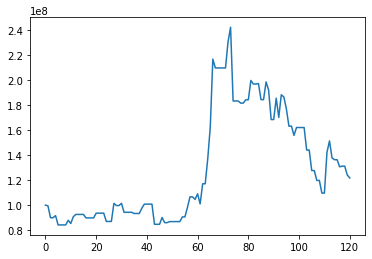

In [3]:
operation10years(lambda year, month:
                 get_csi300(*get_last_month(year, month)) > get_csi300(*get_last_month(*get_last_month(year, month))))

# 3. 如果过去10年，每个月初进行一次判断，如果上个月沪深300指数涨了，按均分买入上个月上涨最大的100只股票（就是每只股票买0.01乘总财富），然后在当月月底卖出，这样持续地每个月操作，这样的策略的收益是怎样的？不用考虑手续费。如果上个月沪深300指数跌了，则在本月无操作。

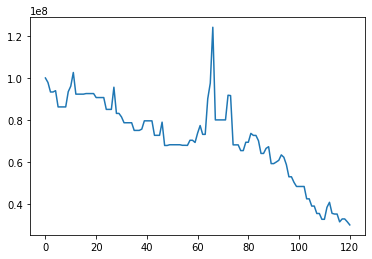

In [4]:
operation10years(lambda year, month:
                 get_csi300(*get_last_month(year, month)) > get_csi300(*get_last_month(*get_last_month(year, month))),
                
                False)

# 4. 如果过去10年，每个月初进行一次判断，如果上个月沪深300指数跌了，按均分买入上个月下跌最大的100只股票（就是每只股票买0.01乘总财富），然后在当月月底卖出，这样持续地每个月操作，这样的策略的收益是怎样的？不用考虑手续费。如果上个月沪深300指数涨了，则在本月无操作。

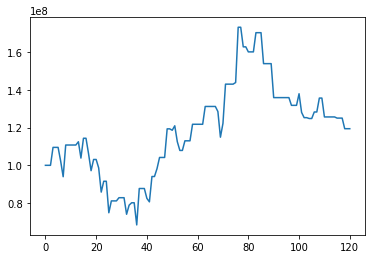

In [5]:
operation10years(lambda year, month:
                 get_csi300(*get_last_month(year, month)) < get_csi300(*get_last_month(*get_last_month(year, month))))